In [1]:
# ------------------------------------------------------------------------
# Library imports
# ------------------------------------------------------------------------

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib as mpl


# ------------------------------------------------------------------------
# Global plotting configuration
# ------------------------------------------------------------------------
# set font size
mpl.rcParams.update({'font.size': 8})

# Set Helvetica font globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']

# Optional: make sure fonts are updated
mpl.rcParams['pdf.fonttype'] = 42  # Avoids Type 3 fonts in PDF output
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams["lines.linewidth"] = 0.5
mpl.rcParams["axes.linewidth"] = 0.5

mpl.rcParams.update({
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.minor.width": 0.5,
})

### Fetch data from nerd sqlite database

In [2]:
def fetch_fit_params(db_path, fit_kind, selected_construct_names, selected_temperature):
    """
    Fetch fit parameters from the database for a given fit kind, construct name, and temperature.
    
    Parameters
    ----------
    fit_kind : str
        Kind of fit to filter by.
    selected_construct_name : str
        Construct name to filter by (e.g., '4U_wt').
    selected_temperature : int
        Temperature to filter by (e.g., 25).
    
    Returns
    -------
    pd.DataFrame
        DataFrame containing the fit parameters.
    """

    conn = sqlite3.connect(db_path)

    placeholders = ", ".join([f":construct_{i}" for i in range(len(selected_construct_names))])
    params = {
        "fit_kind": fit_kind,
        "temperature": selected_temperature,
        **{f"construct_{i}": name for i, name in enumerate(selected_construct_names)},
    }

    fit_params_df = pd.read_sql_query(
        f"""
        SELECT
            log_kobs,
            log_kdeg,
            r2,
            nt_base,
            nt_site,
            construct_name
        FROM probe_tc_fits_view
        WHERE fit_kind = :fit_kind
        AND construct_name IN ({placeholders})
        AND temperature = :temperature
        """,
        conn,
        params=params,
    )

    conn.close()

    return fit_params_df

### Main function definition and execution

In [3]:
NERD_SQLITE = '../../../Core_nerd_analysis/nerd.sqlite'

# Fetches all reps for 4U_wt at 25C
df = fetch_fit_params(
    db_path=NERD_SQLITE,
    fit_kind='round3_constrained', # Constrained for global kdeg
    selected_construct_names = ['4U_wt'],
    selected_temperature = 25,
)

# Melt dataframe for seaborn plot
df_melted = df.melt(id_vars=['nt_base', 'nt_site', 'construct_name'], value_vars=['log_kobs', 'log_kdeg', 'r2'], var_name='parameter', value_name='value')

# Sort by base (only A and C)
bases = ['A', 'C']
df_melted['nt_base'] = pd.Categorical(df_melted['nt_base'], categories=bases, ordered=True)

#### Swarm plot for $R^2$

In [10]:
r2_toplot

,nt_base,nt_site,construct_name,parameter,value
338,A,7,4U_wt,r2,9.985786e-01
339,A,8,4U_wt,r2,-2.683783e-09
340,C,9,4U_wt,r2,5.454679e-01
346,A,15,4U_wt,r2,9.965762e-01
347,A,16,4U_wt,r2,9.976862e-01
349,A,18,4U_wt,r2,9.999131e-01
353,A,22,4U_wt,r2,9.971350e-01
356,C,25,4U_wt,r2,8.370745e-02
357,A,26,4U_wt,r2,9.970624e-01
360,A,29,4U_wt,r2,9.926545e-01


/opt/homebrew/Caskroom/miniforge/base/envs/data_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/data_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


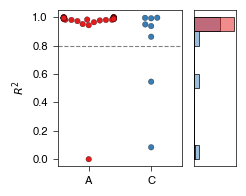

Number of R2 > 0.8: 45 out of 48
Percentage of R2 > 0.8: 93.75%


In [7]:
# Filter for r2 only
r2_toplot = df_melted[df_melted['parameter'] == 'r2']

# Swarmplot for r2
fig, axs = plt.subplots(1, 2, figsize=(2.5, 2), sharey = True, gridspec_kw={'width_ratios': [3, 1]})
sns.swarmplot(data=r2_toplot, x='nt_base', y='value', hue='nt_base', palette = 'Set1', dodge = False, size = 4, edgecolor = 'k', linewidth = 0.2, ax = axs[0])
# gray line at r2 0.8
axs[0].axhline(0.8, color='gray', linestyle='--', linewidth=0.8)
axs[0].set_xlabel('')
axs[0].set_ylabel(r'$R^2$')
# remove legend from axs[0]
axs[0].get_legend().remove()

# Plot histogram on axs[1]
sns.histplot(data=r2_toplot, y='value', hue='nt_base', palette = 'Set1', bins = 10, stat='proportion', linewidth = 0.5, common_norm=False, kde = False, alpha = 0.5, ax = axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Remove ticks x and y
axs[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# Remove legend from axs[1]
axs[1].get_legend().remove()

plt.tight_layout()
plt.savefig('swarmplot_r2_rd3_AC_4U_25C.pdf')
plt.show()

# Count how many R2 > 0.8 in total
r2_toplot = r2_toplot.dropna(subset=['nt_base'])
r2_high = r2_toplot[r2_toplot['value'] > 0.8]
r2_high_count = r2_high.shape[0]
r2_total_count = r2_toplot.shape[0]
print(f'Number of R2 > 0.8: {r2_high_count} out of {r2_total_count}')
print(f'Percentage of R2 > 0.8: {r2_high_count / r2_total_count * 100:.2f}%')

#### Swarm plot for $\ln (k_{text{obs}})$

/var/folders/18/qp7ngpw963z9q34k6mzb5jc80000gn/T/ipykernel_70146/3202433084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logkobs_toplot['kobs'] = np.exp(logkobs_toplot['value'])
/opt/homebrew/Caskroom/miniforge/base/envs/data_analysis/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


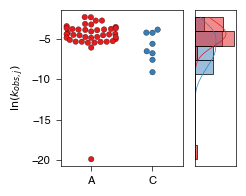

In [5]:
# Filter for log_kobs only
logkobs_toplot = df_melted[df_melted['parameter'] == 'log_kobs']
logkobs_toplot['kobs'] = np.exp(logkobs_toplot['value'])

# Swarmplot for log_kobs
fig, axs = plt.subplots(1, 2, figsize=(2.5, 2), sharey = True, gridspec_kw={'width_ratios': [3, 1]})
sns.swarmplot(data=logkobs_toplot, x='nt_base', y='value', hue='nt_base', palette = 'Set1', dodge = False, size = 4, edgecolor = 'k', linewidth = 0.2, ax = axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel(r'$\ln(k_{obs,j})$')
axs[0].get_legend().remove()

# plot histogram on axs[1]
sns.histplot(data=logkobs_toplot, y='value', hue='nt_base', palette = 'Set1', bins = 10, stat='proportion', linewidth = 0.5, common_norm=False, kde = True, alpha = 0.5, ax = axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# remove ticks x and y
axs[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# remove legend from axs[1]
axs[1].get_legend().remove()

plt.tight_layout()
plt.savefig('swarmplot_lnkobs_rd3_AC_4U_25C.pdf')
plt.show()